###  - Breast Cancer Dataset   

#### **Dataset Overview**  
This dataset contains information on **4024 female breast cancer patients** diagnosed between **2006 and 2010**. The data was sourced from the **SEER Program (National Cancer Institute)** in its **November 2017 update**. It provides details on tumor characteristics, lymph node involvement, hormone receptor status, and patient survival.  

#### **Data Features**  
The dataset includes **16 columns** with both categorical and numerical data:  

| Column | Description |
|--------|------------|
| **Age** | Age of the patient at diagnosis |
| **Race** | Patient's race (e.g., White, Black, Asian) |
| **Marital Status** | Marital status of the patient |
| **T Stage** | Tumor stage based on size and extent of spread |
| **N Stage** | Lymph node involvement stage |
| **6th Stage** | Cancer staging classification |
| **Differentiate** | Tumor differentiation level (e.g., Well, Moderately, Poorly differentiated) |
| **Grade** | Tumor grade (severity of cancer cells) |
| **A Stage** | Another classification of cancer stage |
| **Tumor Size** | Size of the tumor (in mm) |
| **Estrogen Status** | Whether the tumor is estrogen receptor-positive or negative |
| **Progesterone Status** | Whether the tumor is progesterone receptor-positive or negative |
| **Regional Node Examined** | Number of lymph nodes examined |
| **Regional Node Positive** | Number of affected lymph nodes |
| **Survival Months** | Number of months the patient survived after diagnosis |
| **Status** | Whether the patient is Alive or Deceased |

#### **Data Summary**  
- **No missing values** in the dataset.  
- **Age range** varies across patients.  
- **Tumor size and survival months** show variations among patients.  
- **Hormone receptor status (Estrogen/Progesterone)** can be a factor in cancer progression.  

#### **Potential Analyses**  
- **Survival Analysis:** Relationship between tumor size, lymph node involvement, and patient survival.  
- **Demographic Trends:** Examining survival rates based on age, race, and marital status.  
- **Tumor Characteristics:** Distribution of tumor grades, hormone receptor status, and staging.  

#### **Usage**  
This dataset is useful for **medical research, machine learning models, and statistical analysis** related to breast cancer prognosis and treatment outcomes.  


# 1]  Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

# 2] Explore Data

In [2]:
cancer=pd.read_csv('/kaggle/input/breast-cancer/Breast_Cancer.csv')

In [3]:
cancer.head(3)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive


In [4]:
cancer.shape

(4024, 16)

In [5]:
cancer.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In [8]:
cancer.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [9]:
cancer.sample(7)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
1120,52,Other,Married,T1,N3,IIIC,Well differentiated,1,Regional,15,Positive,Positive,30,30,80,Dead
1277,66,White,Single,T2,N2,IIIA,Poorly differentiated,3,Regional,21,Positive,Positive,8,8,49,Alive
1666,45,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,10,Positive,Positive,6,1,63,Alive
2439,62,White,Married,T1,N1,IIA,Well differentiated,1,Regional,7,Positive,Positive,27,1,54,Alive
1171,46,Black,Single,T1,N1,IIA,Moderately differentiated,2,Regional,11,Positive,Positive,12,2,48,Alive
3726,46,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,65,Positive,Positive,12,10,30,Dead
2285,58,White,Married,T1,N3,IIIC,Moderately differentiated,2,Regional,20,Positive,Positive,18,17,42,Dead


In [10]:
cancer.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

# 3] Data Analysis

In [11]:
cancer['Status'].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

<Axes: xlabel='Status'>

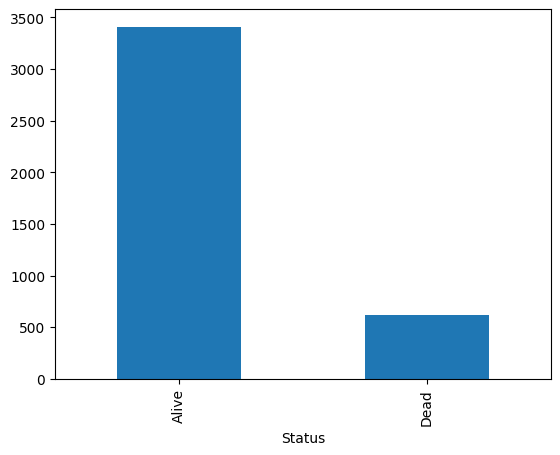

In [12]:
cancer['Status'].value_counts().plot(kind='bar')

In [13]:
cancer.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

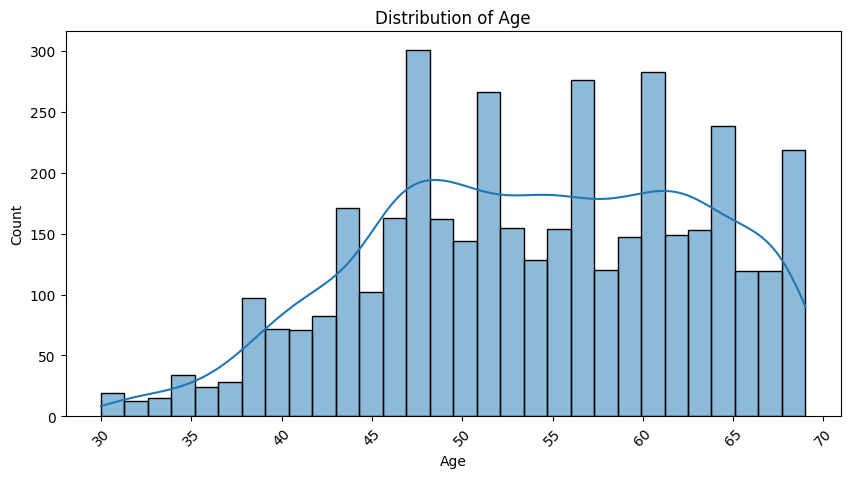

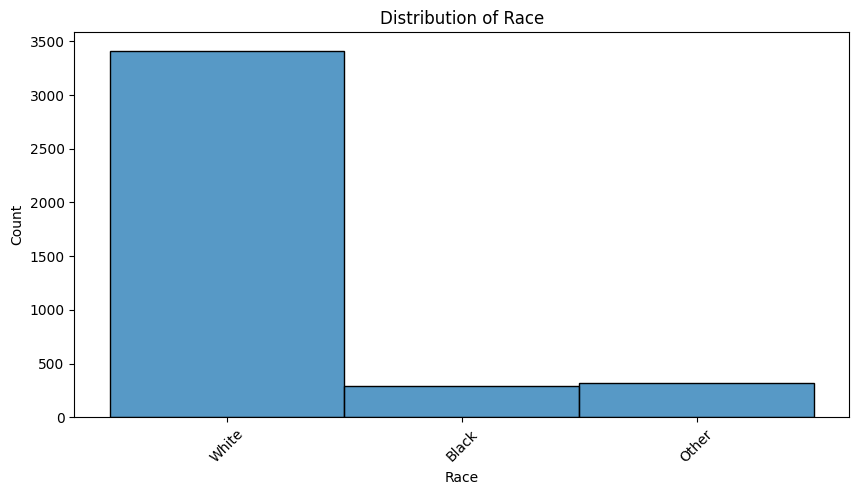

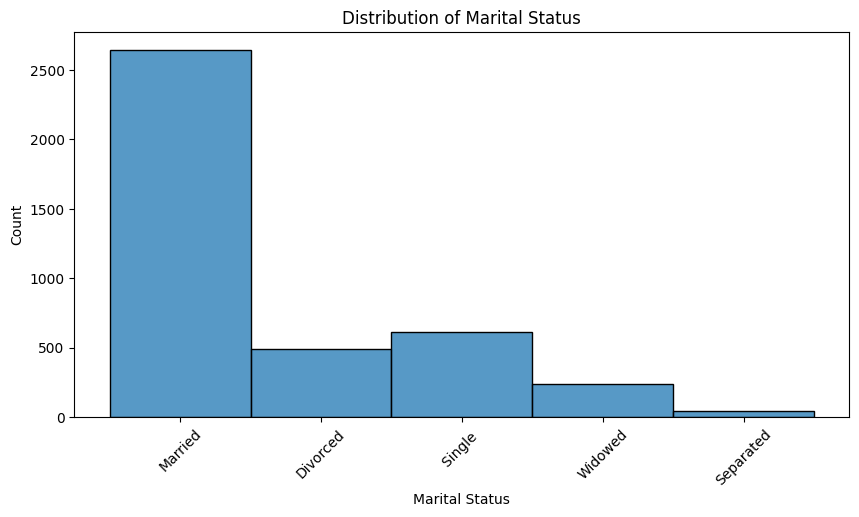

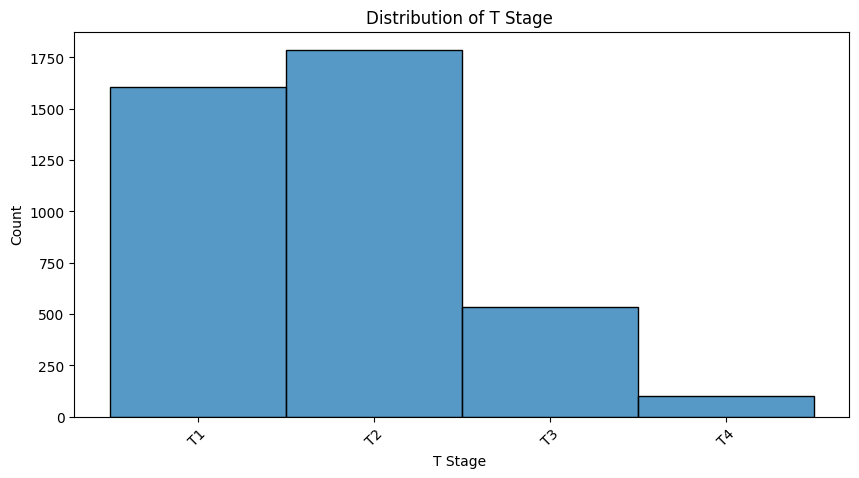

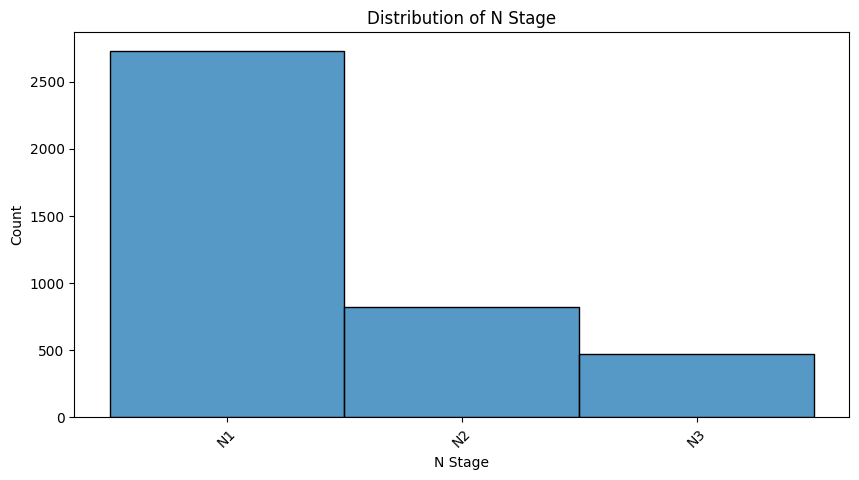

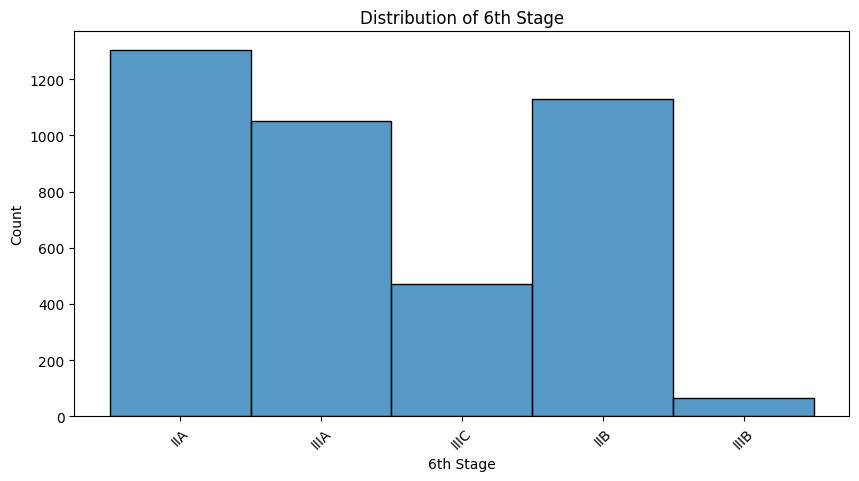

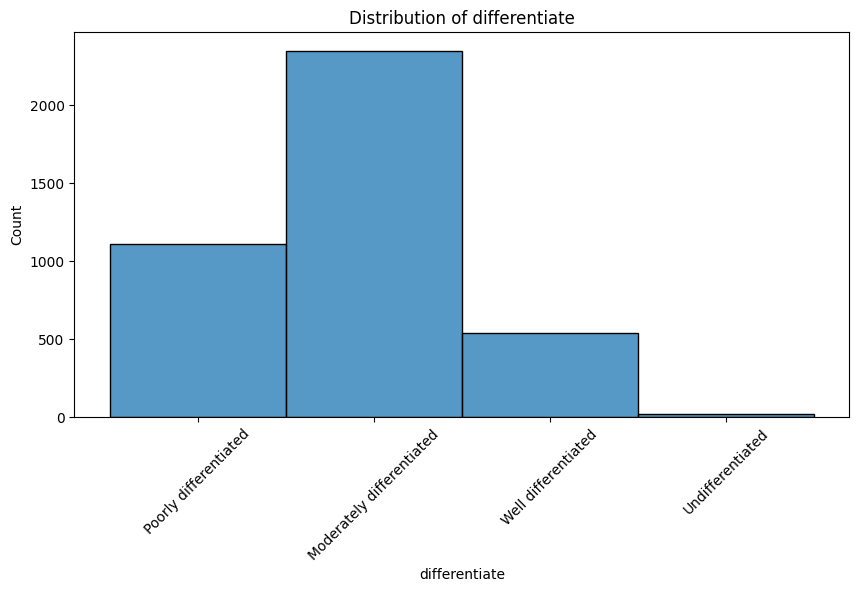

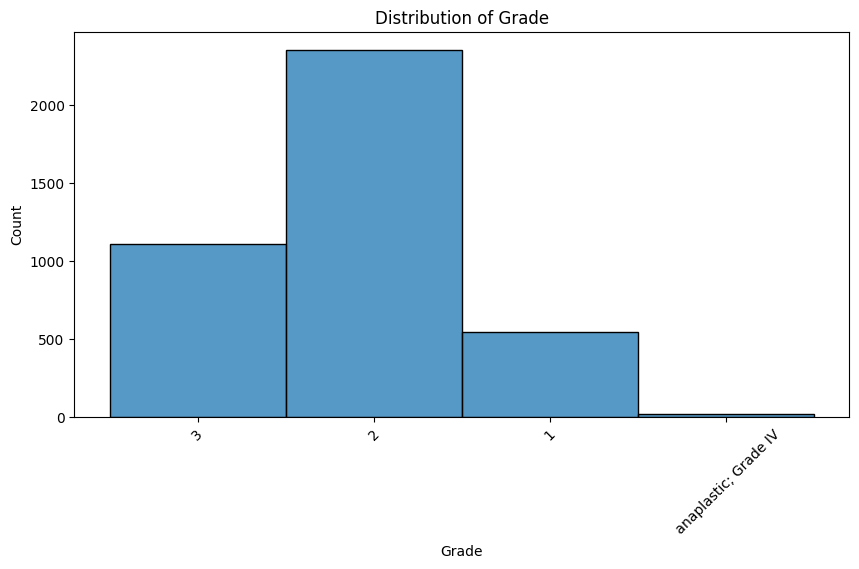

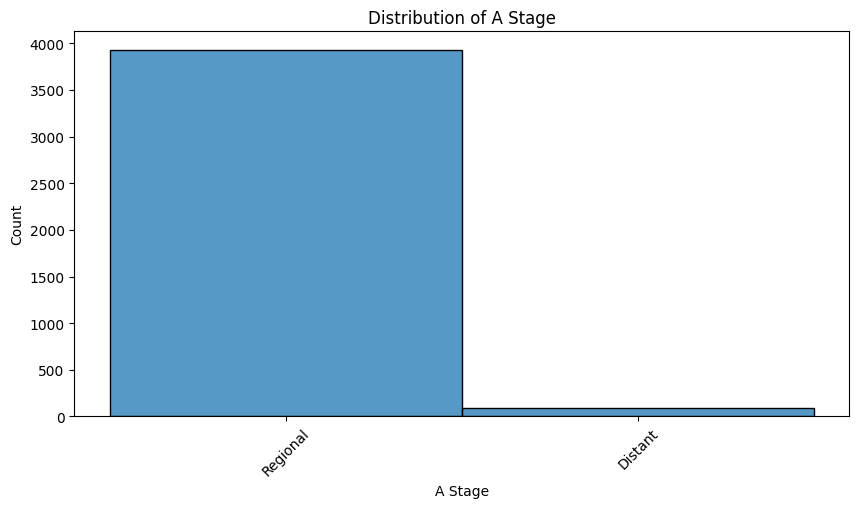

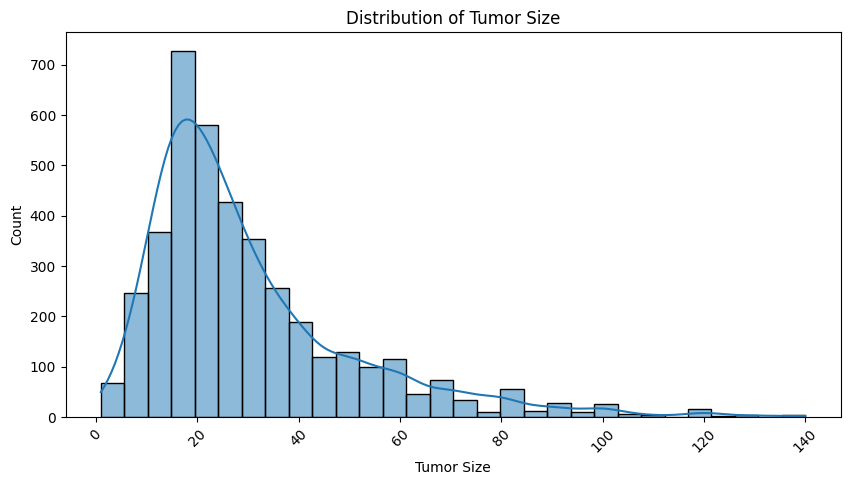

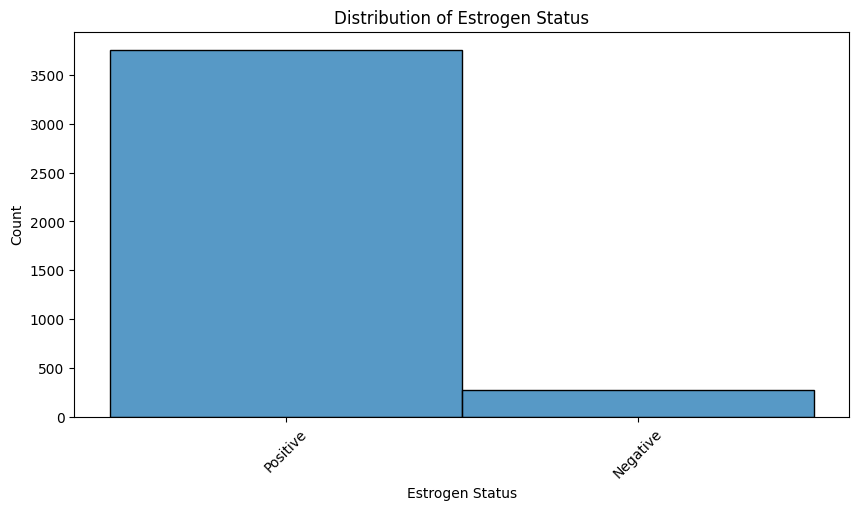

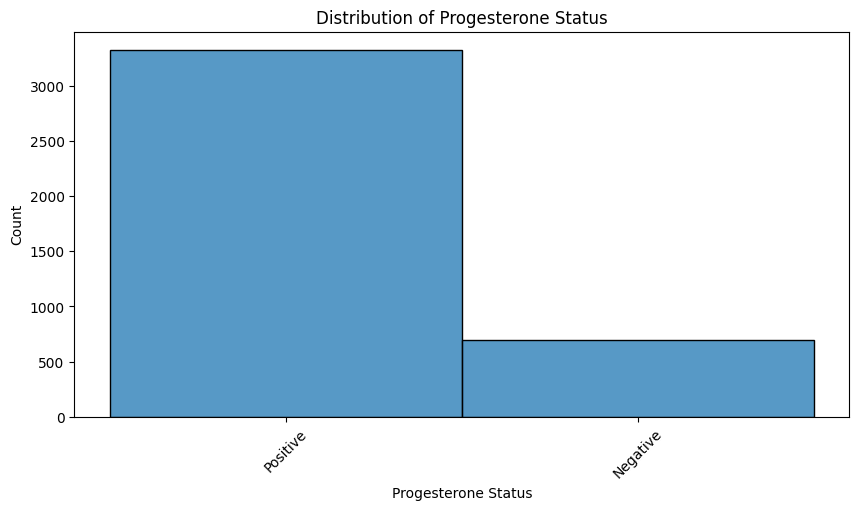

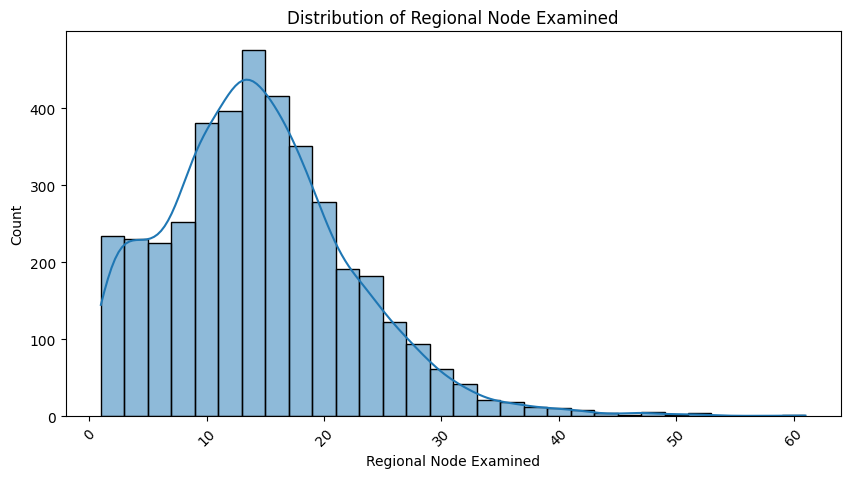

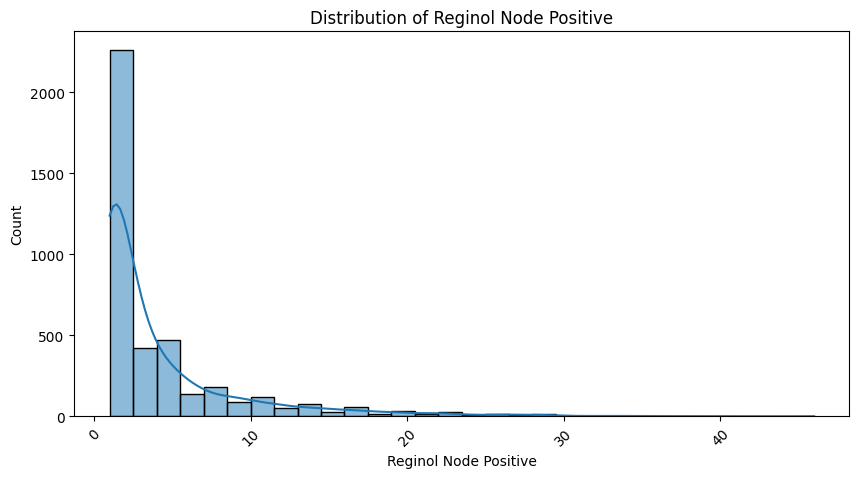

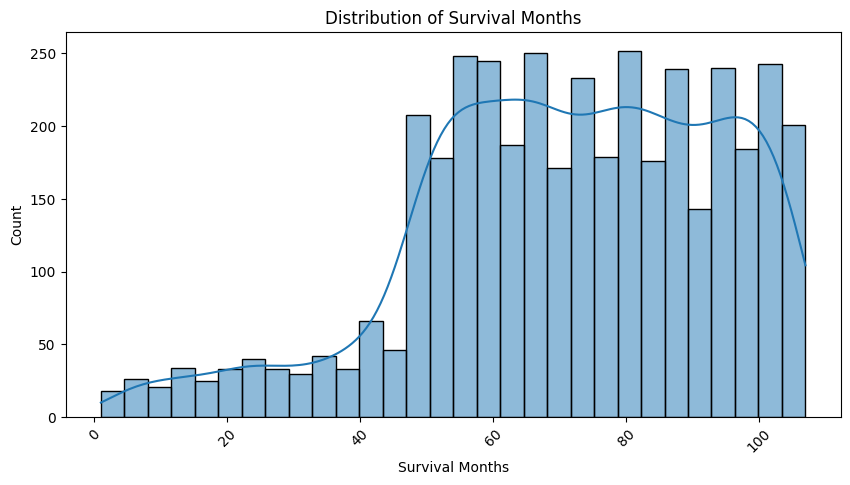

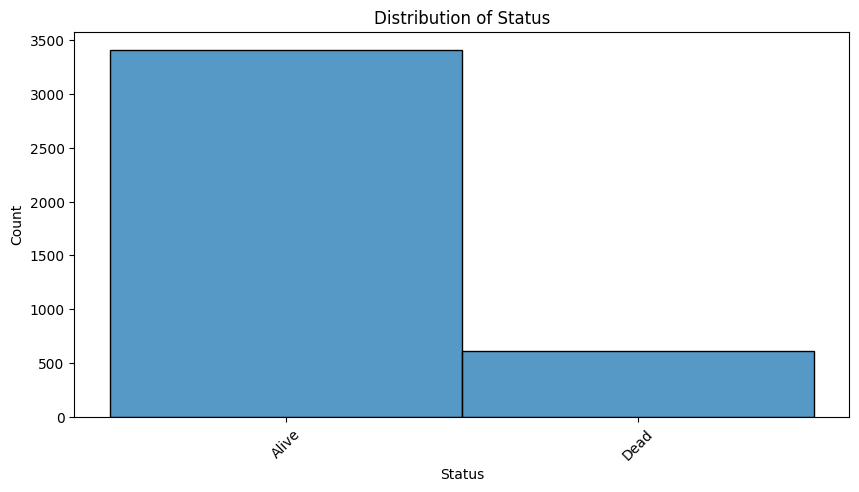

In [14]:

plt.figure(figsize=(12, 6))

for col in cancer.columns:
    plt.figure(figsize=(10, 5))
    if cancer[col].dtype == 'object':  
        sns.histplot(cancer[col], kde=False)
    else:  
        sns.histplot(cancer[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# 4] Preprocessing

Transform object to int 

In [15]:
la = LabelEncoder()

In [16]:
ob=cancer.select_dtypes(include='object')
non_ob=cancer.select_dtypes(exclude='object')

In [17]:
ob.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive


In [18]:
non_ob.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,68,4,24,1,60
1,50,35,14,5,62
2,58,63,14,7,75
3,58,18,2,1,84
4,47,41,3,1,50


In [19]:
for i in range(0,ob.shape[1]):
    ob.iloc[:,i]=la.fit_transform(ob.iloc[:,i])

In [20]:
ob.head()

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,2,1,0,0,0,1,3,1,1,1,0
1,2,1,1,1,2,0,2,1,1,1,0
2,2,0,2,2,4,0,2,1,1,1,0
3,2,1,0,0,0,1,3,1,1,1,0
4,2,1,1,0,1,1,3,1,1,1,0


In [21]:
ob=ob.astype('int')

In [22]:
ob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Race                 4024 non-null   int64
 1   Marital Status       4024 non-null   int64
 2   T Stage              4024 non-null   int64
 3   N Stage              4024 non-null   int64
 4   6th Stage            4024 non-null   int64
 5   differentiate        4024 non-null   int64
 6   Grade                4024 non-null   int64
 7   A Stage              4024 non-null   int64
 8   Estrogen Status      4024 non-null   int64
 9   Progesterone Status  4024 non-null   int64
 10  Status               4024 non-null   int64
dtypes: int64(11)
memory usage: 345.9 KB


In [23]:
cancer=pd.concat([ob,non_ob],axis=1)

In [24]:
cancer

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,2,1,0,0,0,1,3,1,1,1,0,68,4,24,1,60
1,2,1,1,1,2,0,2,1,1,1,0,50,35,14,5,62
2,2,0,2,2,4,0,2,1,1,1,0,58,63,14,7,75
3,2,1,0,0,0,1,3,1,1,1,0,58,18,2,1,84
4,2,1,1,0,1,1,3,1,1,1,0,47,41,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,1,1,0,0,0,0,2,1,1,1,0,62,9,1,1,49
4020,2,0,1,1,2,0,2,1,1,1,0,56,46,14,8,69
4021,2,1,1,0,1,0,2,1,1,0,0,68,22,11,3,69
4022,0,0,1,0,1,0,2,1,1,1,0,58,44,11,1,72


# 5] Build Model

In [25]:
x=cancer.drop(['Status'],axis=1)

In [26]:
y=cancer['Status']

In [27]:
x

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
0,2,1,0,0,0,1,3,1,1,1,68,4,24,1,60
1,2,1,1,1,2,0,2,1,1,1,50,35,14,5,62
2,2,0,2,2,4,0,2,1,1,1,58,63,14,7,75
3,2,1,0,0,0,1,3,1,1,1,58,18,2,1,84
4,2,1,1,0,1,1,3,1,1,1,47,41,3,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,1,1,0,0,0,0,2,1,1,1,62,9,1,1,49
4020,2,0,1,1,2,0,2,1,1,1,56,46,14,8,69
4021,2,1,1,0,1,0,2,1,1,0,68,22,11,3,69
4022,0,0,1,0,1,0,2,1,1,1,58,44,11,1,72


In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: Status, Length: 4024, dtype: int64

Over Sampling

In [29]:
RS=RandomOverSampler(random_state=42)
x_rs,y_rs=RS.fit_resample(x,y)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_rs,y_rs, test_size=0.2, random_state=42)

In [31]:
Model_LR=LogisticRegression()
Model_RF=RandomForestClassifier()
Model_SVC=SVC()
Model_XGB=XGBClassifier()
Model_GBoosting=GradientBoostingClassifier()

In [32]:
def predictt(model):
    model.fit(x_train,y_train)
    model.predict(x_test)
    print(classification_report(model.predict(x_test),y_test))

In [33]:
predictt(Model_LR)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       730
           1       0.76      0.82      0.79       634

    accuracy                           0.80      1364
   macro avg       0.80      0.80      0.80      1364
weighted avg       0.80      0.80      0.80      1364



In [34]:
predictt(Model_RF)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       645
           1       1.00      0.95      0.97       719

    accuracy                           0.97      1364
   macro avg       0.97      0.97      0.97      1364
weighted avg       0.97      0.97      0.97      1364



In [35]:
predictt(Model_SVC)

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       768
           1       0.73      0.84      0.78       596

    accuracy                           0.80      1364
   macro avg       0.80      0.80      0.80      1364
weighted avg       0.81      0.80      0.80      1364



In [36]:
predictt(Model_XGB)

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       632
           1       1.00      0.93      0.96       732

    accuracy                           0.96      1364
   macro avg       0.96      0.96      0.96      1364
weighted avg       0.96      0.96      0.96      1364



In [37]:
predictt(Model_GBoosting)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       725
           1       0.80      0.86      0.83       639

    accuracy                           0.84      1364
   macro avg       0.84      0.84      0.84      1364
weighted avg       0.84      0.84      0.84      1364

